#Exercise 3

For this exercise, we make some simple visualizations of particles subject to different environments.

We use the following packages:

NumPy -> allows us to use some math operations and NumPy arrays

Pandas -> gives us use of a DataFrame which will store experiment data in a 2D array used for the visualizations

Plotly -> allows us to make interactive data visualizations

Plotly.express -> allows us to create plots in a single line

Plotly.io -> controls how Plotly's visualizations are displayed

Sympy -> used to calculate gradients

Spb -> used to make plots of functions

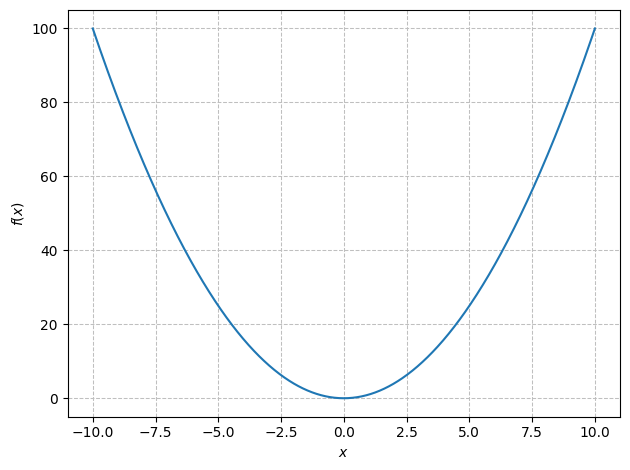

In [2]:
import numpy as np

import pandas as pd

import plotly.express as px
import plotly.io as pio

# Use an interactive frame for visualizations
pio.renderers.default = 'iframe'

from sympy import symbols, diff, sin, cos, exp, sqrt

# we define a function f with symbols x, and y, representing the x, and y dimension
x, y = symbols('x y')
f = sin(x) + cos(y)
f

from spb import plot, graphics, contour

# this is an example of a plot
plot(x*x)


In [3]:
def generate_initial_swarm_positions(N):
    """
    Generate initial swarm positions
    :param N: number of swarm positions
    :return: the initial swarm positions
    """
    return np.random.rand(N, 2)

def make_df(data, t, type_name):
    """
    Create a dataframe for simulating the swarm
    """
    df = pd.DataFrame(data, columns=["x", "y"])
    df['t'] = t
    df['type'] = type_name
    df['pid'] = range(len(data))
    return df

In [4]:
# diff is able to calculate the (partial) derivative of the function f by either x or y
partial = diff(f, x)
print(partial)

# a vector of the partial derivatives is by definition the gradient of the function
grad = [diff(f, x), diff(f, y)]
grad

cos(x)


[cos(x), -sin(y)]

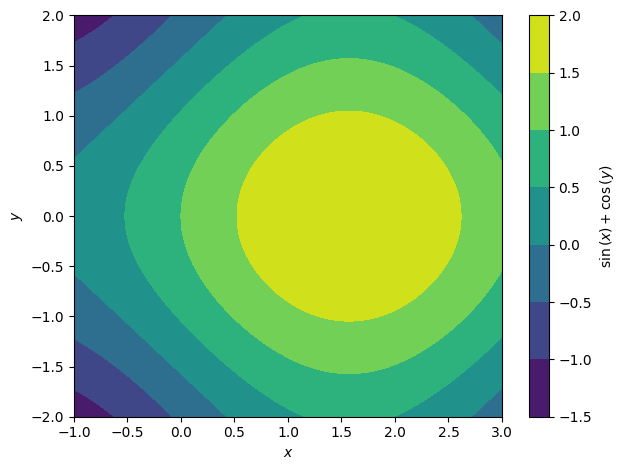

In [5]:
# the 2d function can be plotted as follows:
graphics(contour(f, (x, -1, 3), (y, -2, 2)), grid=False)

In [6]:
# the gradient function traslated to python code
def grad_function(x: np.array):
    return np.array([np.cos(x[0]), -np.sin(x[1])])

# forces between a pair of particles i, j
def force_ij(i, j, dist, particles, k=0.3):
    xi_minus_xj = particles[i, :] - particles[j, :]
    f = -k * (np.linalg.norm(xi_minus_xj) - dist) * xi_minus_xj
    return f

# force for particle i
def force_i(i, particles, d=0.1, k=0.3):
    f = np.array([0.0, 0.0])
    for j, x in enumerate(particles):
        if j == i:
            continue
        f = f + force_ij(i, j, d, particles, k=k)
        f += 0.01 * grad_function(x)
    return f

# forces for all particles
def force(particles, k=0.1, d=0.1):
    return np.array([force_i(i, particles, d=d, k=k) for i, _ in enumerate(particles)])


In [7]:
# run an experiment with N random particles and a random pattern
l = []
data = []
N = 12
w = 0.3
pattern = generate_initial_swarm_positions(N)
x = generate_initial_swarm_positions(N)
v = np.zeros_like(x)
for t in range(30):
    # record the current state at time t
    data.append(make_df(x, t, "particle"))
    # update v and x
    v = force(x, k=0.3, d=0.2) + w * v
    x = x + v
df = pd.concat(data)

# show the result
fig = px.scatter(df, x="x", y="y", color="pid", animation_frame="t", animation_group="pid", facet_col="type")
fig.update_layout(xaxis_range=(0, 2), yaxis_range=(-1, 1), width=800, height=800)
fig.update_traces(marker={"size": 12})
fig.show()